<a href="https://colab.research.google.com/github/Tooba-Af/list-E-Commerce-Data-Analysis-using-Python-Google-Colab-/blob/main/Olist_E_Commerce_Data_Analysis_using_Python_(Google_Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python environment & libraries**

In [1]:
# Recommended: create a virtualenv or conda env
# pip install pandas numpy matplotlib seaborn scikit-learn plotly sqlalchemy jupyterlab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from datetime import timedelta

**Loading data (example paths)**

In [6]:
import pandas as pd

customers = pd.read_csv('/content/olist_customers_dataset.csv')
print(customers.shape)
customers.head()


(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
import os
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime

In [13]:
!pip install python-pptx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 12.8 MB/s eta 0:00:00


In [15]:
def load_csv(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    return pd.read_csv(path)

In [17]:
def show_df_info(df, name):
    print(f"\n== {name} shape: {df.shape} ==")
    display(df.head())
    print(df.info())
    print(df.describe(include='all').T)

In [18]:
# ----------------------------
# 3. Load the dataset(s)
# ----------------------------
# The user provided: /content/olist_customers_dataset.csv
# Typical Olist dataset also contains these files (if you have them):
# olist_orders_dataset.csv, olist_order_items_dataset.csv, olist_products_dataset.csv,
# olist_sellers_dataset.csv, olist_order_payments_dataset.csv, olist_order_reviews_dataset.csv


customers_path = '/content/olist_customers_dataset.csv'
orders_path = '/content/olist_orders_dataset.csv'
order_items_path = '/content/olist_order_items_dataset.csv'
products_path = '/content/olist_products_dataset.csv'
payments_path = '/content/olist_order_payments_dataset.csv'
reviews_path = '/content/olist_order_reviews_dataset.csv'

In [19]:
# Load the file(s) that exist
customers = load_csv(customers_path)
print('Loaded customers')

Loaded customers


In [21]:
# Attempt to load optional files and catch missing ones (not fatal)
optional_files = {}
for p,name in [(orders_path,'orders'),(order_items_path,'order_items'),(products_path,'products'),(payments_path,'payments'),(reviews_path,'reviews')]:
    try:
        optional_files[name] = load_csv(p)
        print(f'Loaded {name}')
    except FileNotFoundError:
        optional_files[name] = None
        print(f'Optional file not found: {p} — you can still proceed with customer-level analysis')

Optional file not found: /content/olist_orders_dataset.csv — you can still proceed with customer-level analysis
Optional file not found: /content/olist_order_items_dataset.csv — you can still proceed with customer-level analysis
Optional file not found: /content/olist_products_dataset.csv — you can still proceed with customer-level analysis
Optional file not found: /content/olist_order_payments_dataset.csv — you can still proceed with customer-level analysis
Optional file not found: /content/olist_order_reviews_dataset.csv — you can still proceed with customer-level analysis


In [22]:


# Unpack optional files to variables if present
orders = optional_files.get('orders')
order_items = optional_files.get('order_items')
products = optional_files.get('products')
payments = optional_files.get('payments')
reviews = optional_files.get('reviews')

In [24]:
# ----------------------------
# 4. Quick data inspection
# ----------------------------
show_df_info(customers, 'customers')


if orders is not None:
    show_df_info(orders, 'orders')
if order_items is not None:
    show_df_info(order_items, 'order_items')
if products is not None:
    show_df_info(products, 'products')


== customers shape: (99441, 5) ==


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
                            count unique                               top  \
customer_id                 99441  99441  274fa6071e5e17fe303b9748641082c8   
customer_unique_id          99441  96096  8d50f5eadf50201ccdcedfb9e2ac8455   
customer_zip_code_prefix  99441.0    NaN                               NaN   
customer_city               99441   4119                         sao paulo   
customer_state              99441     27                             

In [25]:
# ----------------------------
# 5. Data cleaning & preprocessing
# ----------------------------
# Customers
customers_clean = customers.copy()

In [26]:
# Standardize column names
customers_clean.columns = [c.strip().lower() for c in customers_clean.columns]

In [32]:
# Check for duplicates
dups = customers_clean.duplicated().sum()
print(f"Customer duplicates: {dups}")

Customer duplicates: 0


In [33]:
# Nulls overview
print('\nCustomers null values:')
print(customers_clean.isnull().sum())


Customers null values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [34]:
# Fix data types if needed (customer_zip_code_prefix -> str)
customers_clean['customer_zip_code_prefix'] = customers_clean['customer_zip_code_prefix'].astype(str)

In [36]:
# Orders — parse dates
if orders is not None:
    orders_clean = orders.copy()
    orders_clean.columns = [c.strip().lower() for c in orders_clean.columns]

In [41]:
customers.columns = [c.lower().strip() for c in customers.columns]
customers.drop_duplicates(inplace=True)
print(customers.isnull().sum())


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Total Customers: 99441
Top Cities:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


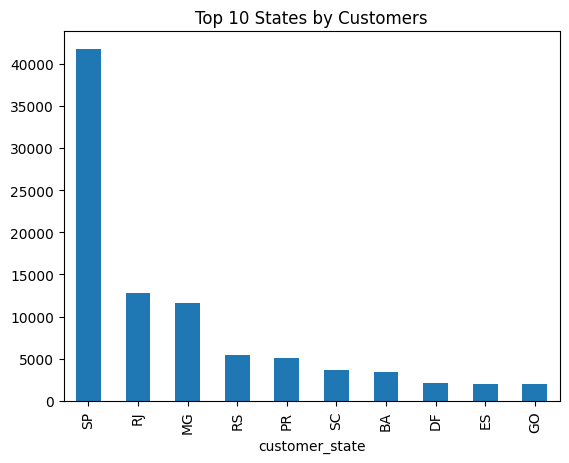

In [42]:
print("Total Customers:", customers["customer_id"].nunique())
print("Top Cities:")
print(customers["customer_city"].value_counts().head(10))

import matplotlib.pyplot as plt
customers["customer_state"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 States by Customers")
plt.show()


In [43]:
customers.to_csv("/content/customers_clean.csv", index=False)
